In [ ]:
#@title ライブラリのインストール

!pip install -q ultralytics
!git clone https://github.com/edihbrandon/RictyDiminished.git

import colorsys
import os
import random
import re

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont
from pydantic import BaseModel
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 10.0 MB/s eta 0:00:00
Cloning into 'RictyDiminished'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 24 (from 1)
Receiving objects: 100% (25/25), 7.07 MiB | 5.82 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



ライブラリのバージョンの確認方法
```
# OpenCVのバージョン
import cv2
print(f"OpenCV (cv2) バージョン: {cv2.__version__}")

# NumPyのバージョン
import numpy as np
print(f"NumPy バージョン: {np.__version__}")

# Matplotlibのバージョン
import matplotlib
print(f"Matplotlib バージョン: {matplotlib.__version__}")

# Pillowのバージョン
import PIL
print(f"Pillow バージョン: {PIL.__version__}")

# Pydanticのバージョン
import pydantic
print(f"Pydantic バージョン: {pydantic.__version__}")

# Ultralyticsのバージョン
import ultralytics
print(f"Ultralytics バージョン: {ultralytics.__version__}")
```

```
OpenCV (cv2) バージョン: 4.10.0
NumPy バージョン: 1.26.4
Matplotlib バージョン: 3.10.0
Pillow バージョン: 11.1.0
Pydantic バージョン: 2.10.4
Ultralytics バージョン: 8.3.59
```

In [ ]:
#@title Google Driveに接続

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


下記のURLから画像ファイルをダウンロードしてください。サイズは1280×785にしてください。ダウンロード後、Google Colabにアップロードしてください。



**[画像のURL](https://pixabay.com/ja/photos/%E5%AD%90%E4%BE%9B-%E7%8A%AC-%E3%83%95%E3%82%A3%E3%83%BC%E3%83%AB%E3%83%89-%E7%94%B7%E3%81%AE%E5%AD%90-6276604/)**


> <a href="https://pixabay.com/ja/users/tonyminguillon-21754980/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=6276604">Tony Minguillon</a>による<a href="https://pixabay.com/ja//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=6276604">Pixabay</a>からの画像



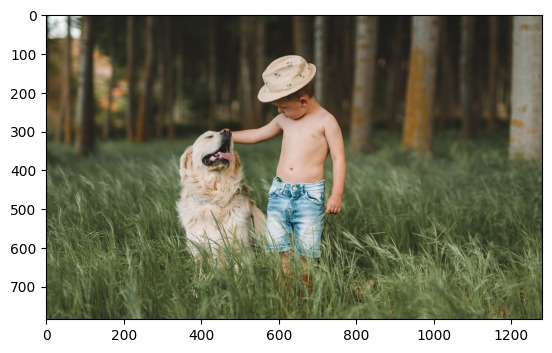

In [ ]:
#@title 画像の準備

img_dir = "/content/drive/MyDrive/Pixabay"  # @param {type:"string"}
img_filename = "child-6276604_1280.jpg"  # @param {type:"string"}

img_path = os.path.join(img_dir, img_filename)
img = cv2.imread(img_path)

plt.imshow(img[:,:,::-1])
plt.show()

In [ ]:
#@title 姿勢推定モデルの準備

model = YOLO('yolov8m-pose.pt')

100%|██████████| 50.8M/50.8M [00:00<00:00, 74.6MB/s]


In [ ]:
#@title クラス一覧

classnames = model.names
print("クラスの数", len(classnames))
print(classnames)

クラスの数 1
{0: 'person'}



0: 416x640 1 person, 1213.0ms
Speed: 18.9ms preprocess, 1213.0ms inference, 32.6ms postprocess per image at shape (1, 3, 416, 640)


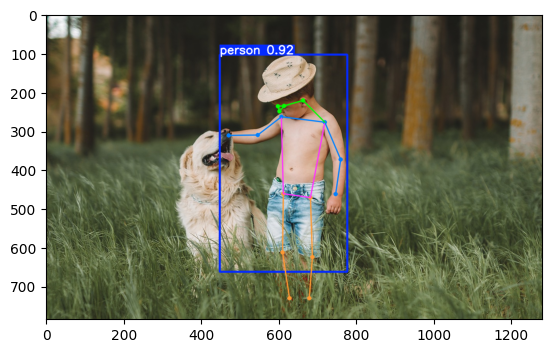

In [ ]:
#@title 推論

results = model.predict(img)

result_plot = results[0].plot()
plt.imshow(result_plot[:,:,::-1])
plt.show()

In [ ]:
#@title ラベルごとの信頼度スコア

INDEX = 0

print("ラベルID: ", results[0].boxes.cls.cpu().numpy().astype(int)[INDEX])
print("信頼度スコア: ", results[0].boxes.conf.cpu().numpy()[INDEX])
print("検出矩形の座標: ", results[0].boxes.xyxy.cpu().numpy()[INDEX])

ラベルID:  0
信頼度スコア:  0.9210212
検出矩形の座標:  [        448         104         777         663]


In [ ]:
#@title 検出した骨格点の座標

results[0].keypoints.data.cpu().numpy()[INDEX]

array([[     602.78,      250.22,     0.91092],
       [     614.96,      236.12,     0.90011],
       [     598.97,      237.08,     0.62975],
       [     663.08,      222.36,     0.81855],
       [          0,           0,     0.21136],
       [     719.11,      278.65,     0.98558],
       [     607.19,      264.22,     0.94676],
       [     760.17,      374.35,     0.96868],
       [     546.78,      311.74,     0.82291],
       [     747.54,      463.57,     0.92933],
       [     471.91,      312.17,     0.77639],
       [        683,      472.84,      0.9917],
       [     612.78,      462.36,      0.9841],
       [     687.99,      625.51,     0.95024],
       [     610.63,      613.73,      0.9197],
       [     679.52,      731.33,     0.65126],
       [     628.32,      731.53,     0.60258]], dtype=float32)

In [ ]:
#@title BBoxの定義

PATH_FONT = "/content/RictyDiminished/RictyDiminishedDiscord-Regular.ttf"
FONT_CACHE: "dict[int, ImageFont.FreeTypeFont]" = {}
CHAR_CACHE: "dict[str, dict[int, tuple[bool, tuple[int, int, int, int], np.ndarray]]]" = {}


class BBox(BaseModel):
    left: float
    top: float
    right: float
    bottom: float
    score: float
    label: int

    def draw(self, img, classnames, color_mapping):
        color = color_mapping[classnames[self.label]]
        cv2.rectangle(
            img,
            pt1=(int(self.left), int(self.top)),
            pt2=(int(self.right), int(self.bottom)),
            color=color,
            thickness=2,
        )

        self._put_text(img, color, classnames)


    def _put_text(self, img: np.ndarray, color, classnames):
        text = classnames.get(self.label, 'not found')
        pos = (int(self.left), int(self.top))
        size = 20

        text = re.sub(r"[\t\n\r]", "", text)
        h, w, *_ = img.shape
        d = img.ndim
        offset = 5
        for char in text:
            jp, bbox, mask = self._get_char_mask(char, size)

            li = pos[0] + bbox[0] + offset
            ti = pos[1] + bbox[1]
            ri = pos[0] + bbox[2] + offset
            bi = pos[1] + bbox[3]

            lm = 0
            tm = 0
            rm = ri - li
            bm = bi - ti

            offset += bbox[2] - bbox[0]

            if li < 0:
                lm -= li
                li = 0
            if ti < 0:
                tm -= ti
                ti = 0
            if ri > w:
                rm -= (ri - w)
                ri = w
            if bi > h:
                bm -= (bi - h)
                bi = h
            if ((ri - li) <= 0) or ((bi - ti) <= 0):
                continue
            if d == 3:
                img[ti:bi, li:ri] = img[ti:bi, li:ri] * (1 - mask[tm:bm, lm:rm, np.newaxis]) + color * mask[tm:bm, lm:rm, np.newaxis]
            else:
                img[ti:bi, li:ri] = img[ti:bi, li:ri] * (1 - mask[tm:bm, lm:rm]) + color * mask[tm:bm, lm:rm]


    @staticmethod
    def _get_char_mask(char: str, size: int):
        def _get_font(size: int) -> "ImageFont.FreeTypeFont":
            if size not in FONT_CACHE:
                FONT_CACHE[size] = ImageFont.truetype(PATH_FONT, size)
            return FONT_CACHE[size]

        if char not in CHAR_CACHE:
            CHAR_CACHE[char] = {}

        caches = CHAR_CACHE[char]
        if size not in caches:
            font = _get_font(size)
            jp = not char.isascii()
            bbox: "tuple[int, int, int, int]" = font.getbbox(char)
            mask: "np.ndarray" = np.asarray(font.getmask(char, "L")).reshape(bbox[3]-bbox[1], bbox[2] - bbox[0]).astype(float) / 255
            caches[size] = (jp, bbox, mask)
        return caches[size]

In [ ]:
#@title Skeletonの定義

# 人体の関節点（キーポイント）の数を定義
_NUM_JOINTS = 17

# 骨格を構成する関節点の接続関係を定義
_EDGES = [
    [0, 1],
    [0, 2],
    [1, 3],
    [2, 4],
    [3, 5],
    [4, 6],
    [5, 6],
    [5, 7],
    [7, 9],
    [6, 8],
    [8, 10],
    [5, 11],
    [6, 12],
    [11, 12],
    [11, 13],
    [13, 15],
    [12, 14],
    [14, 16],
]

# 骨格の線（エッジ）の色を定義 (BGR形式)
_EC = [
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 195),
    (195, 255, 1),
    (195, 255, 1),
    (0, 255, 0),
    (0, 255, 0),
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 195),
    (195, 255, 1),
    (195, 255, 1),
    (0, 255, 0),
    (0, 255, 0),
]

# 関節点（キーポイント）の色を定義 (BGR形式)
_COLORS_HP = [
    (195, 255, 195),
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 1),
    (0, 255, 0),
    (195, 255, 1),
    (0, 255, 0),
]


class Skeleton:
    """
    人体の骨格を表現・描画するためのクラス
    """
    def __init__(self, key_points: np.ndarray, score: np.ndarray):
        """
        コンストラクタ
        Args:
            key_points: 検出された関節点の座標 (shape: [関節点数, 2])
            score: 各関節点の検出信頼度
        """
        self.key_points: np.ndarray = key_points
        self.score: np.ndarray = score

    def draw(self, img: np.ndarray):
        """
        骨格を画像上に描画するメソッド
        Args:
            img: 描画対象の画像（OpenCV形式、BGR）
        """
        points = self.key_points

        # 各関節点を円として描画
        for j in range(_NUM_JOINTS):
            cv2.circle(
                img,                            # 描画対象の画像
                (points[j, 0], points[j, 1]),   # 円の中心座標 (x, y)
                5,                              # 円の半径
                _COLORS_HP[j],                  # 円の色
                -1                              # -1は円を塗りつぶす
            )

        # 関節点同士を線で接続
        for j, e in enumerate(_EDGES):
            # 座標が0以下の場合はスキップ（無効な検出結果）
            if points[e].min() <= 0:
                continue

            # 2点間に線を描画
            cv2.line(
                img,                            # 描画対象の画像
                (points[e[0], 0], points[e[0], 1]),  # 始点の座標
                (points[e[1], 0], points[e[1], 1]),  # 終点の座標
                _EC[j],                         # 線の色
                2,                              # 線の太さ
                lineType=cv2.LINE_AA,           # アンチエイリアス処理を適用
            )

In [ ]:
#@title Detectionの定義

class Detection:
    """
    物体検出とスケルトン検出の結果を統合して扱うクラス
    バウンディングボックスと骨格情報の両方を管理する
    """
    def __init__(self, bbox: BBox, skeleton: Skeleton):
        """
        初期化メソッド
        Args:
            bbox: 検出された物体の境界ボックス情報
            skeleton: 検出された人物の骨格情報
        """
        self.bbox: BBox = bbox
        self.skeleton: Skeleton = skeleton

    def draw(self, img, classnames, color_mapping):
        """
        検出結果を画像上に描画するメソッド
        バウンディングボックスと骨格の両方を描画する

        Args:
            img: 描画対象の画像
            classnames: クラスIDと名前の対応辞書
            color_mapping: クラス名と描画色の対応辞書
        """
        # バウンディングボックスを描画
        self.bbox.draw(img, classnames, color_mapping)
        # 骨格を描画
        self.skeleton.draw(img)

    @classmethod
    def postprocess(cls, result) -> "Detection":
        """
        YOLOの推論結果からDetectionオブジェクトを生成するクラスメソッド

        Args:
            result: YOLOの推論結果（物体検出と骨格検出の両方を含む）

        Returns:
            Detection: 生成された検出結果オブジェクト

        Note:
            バウンディングボックスと骨格情報の両方を処理する
        """
        # バウンディングボックス情報を生成
        bbox = cls._create_bbox(result)
        # 骨格情報を生成
        skeleton = cls._create_skeleton(result)
        # 新しいDetectionインスタンスを生成して返す
        return cls(bbox, skeleton)

    @staticmethod
    def _create_bbox(result) -> BBox:
        """
        YOLOの推論結果からバウンディングボックスを生成する

        Args:
            result: YOLOの推論結果

        Returns:
            BBox: 生成されたバウンディングボックスオブジェクト

        Note:
            GPU上のテンソルをCPU上のNumPy配列に変換して処理
        """
        # バウンディングボックスの座標をCPUに転送しNumPy配列に変換
        xyxy = result.boxes.xyxy.cpu().numpy()[0]

        return BBox(
            left=int(xyxy[0]),    # 左端のx座標
            top=int(xyxy[1]),     # 上端のy座標
            right=int(xyxy[2]),   # 右端のx座標
            bottom=int(xyxy[3]),  # 下端のy座標
            # 検出の信頼度スコア
            score=float(result.boxes.conf.cpu().numpy()[0]),
            # 検出されたクラスのラベル
            label=int(result.boxes.cls.cpu().numpy()[0])
        )

    @staticmethod
    def _create_skeleton(result) -> Skeleton:
        """
        YOLOの推論結果から骨格情報を生成する

        Args:
            result: YOLOの推論結果

        Returns:
            Skeleton: 生成された骨格オブジェクト

        Note:
            - キーポイントは[x, y, confidence]の形式で提供される
            - x, y座標は整数に変換される
        """
        # キーポイント情報をCPUに転送しNumPy配列に変換
        keypoints = result.keypoints.data.cpu().numpy()[0]

        return Skeleton(
            # キーポイントの座標情報 (x, y) を整数型に変換
            key_points=keypoints[:, :2].astype(int),
            # キーポイントの信頼度スコア
            score=keypoints[:, 2]
        )

In [ ]:
#@title 結果の再整理

detections = [Detection.postprocess(result) for result in results[0]]
for det in detections:
    print("det.bbox", det.bbox)
    print("det.skeleton", det.skeleton)

det.bbox left=448.0 top=104.0 right=777.0 bottom=663.0 score=0.9210212230682373 label=0
det.skeleton <__main__.Skeleton object at 0x7846f00c0f10>


In [ ]:
#@title 色の準備

GOLDEN_RATIO = 0.618033988749895

def get_color(idx: int, s: float = 0.8, vmin: float = 0.7) -> tuple[int, int, int]:
        h = np.fmod(idx * GOLDEN_RATIO, 1.0)
        v = 1.0 - np.fmod(idx * GOLDEN_RATIO, 1.0 - vmin)
        r, g, b = colorsys.hsv_to_rgb(h, s, v)
        return (int(255 * b), int(255 * g), int(255 * r))

color_mapping = {
            element: get_color(idx)
            for idx, element in enumerate(classnames.values())
        }

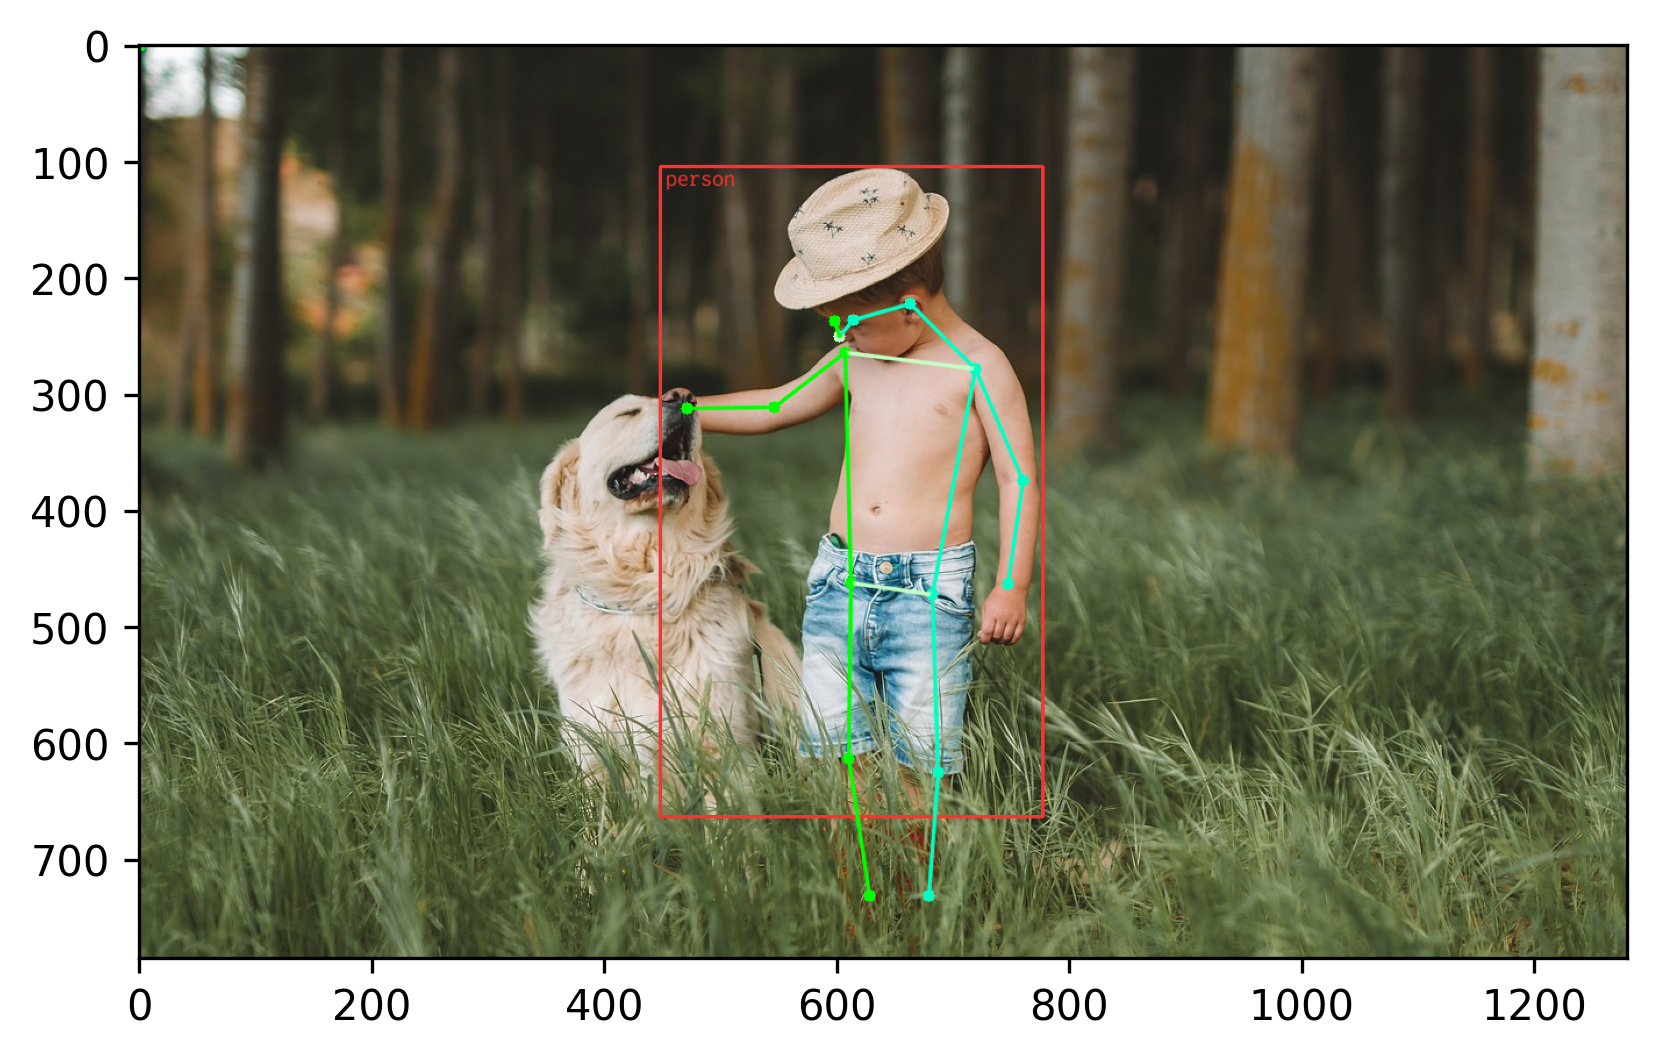

In [ ]:
#@title 描画

result_img = img.copy()

for det in detections:
    det.draw(result_img, classnames, color_mapping)

plt.figure(dpi=300)
plt.imshow(result_img[:,:,::-1])
plt.show()